# 1) Problem 4.8.13 - This question should be answered using the Weekly data set

# (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from patsy import dmatrices

%matplotlib inline

In [2]:
df = pd.read_csv('Weekly.csv', index_col = None)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
# descriptive statistics
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [4]:
#correlation matrix
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


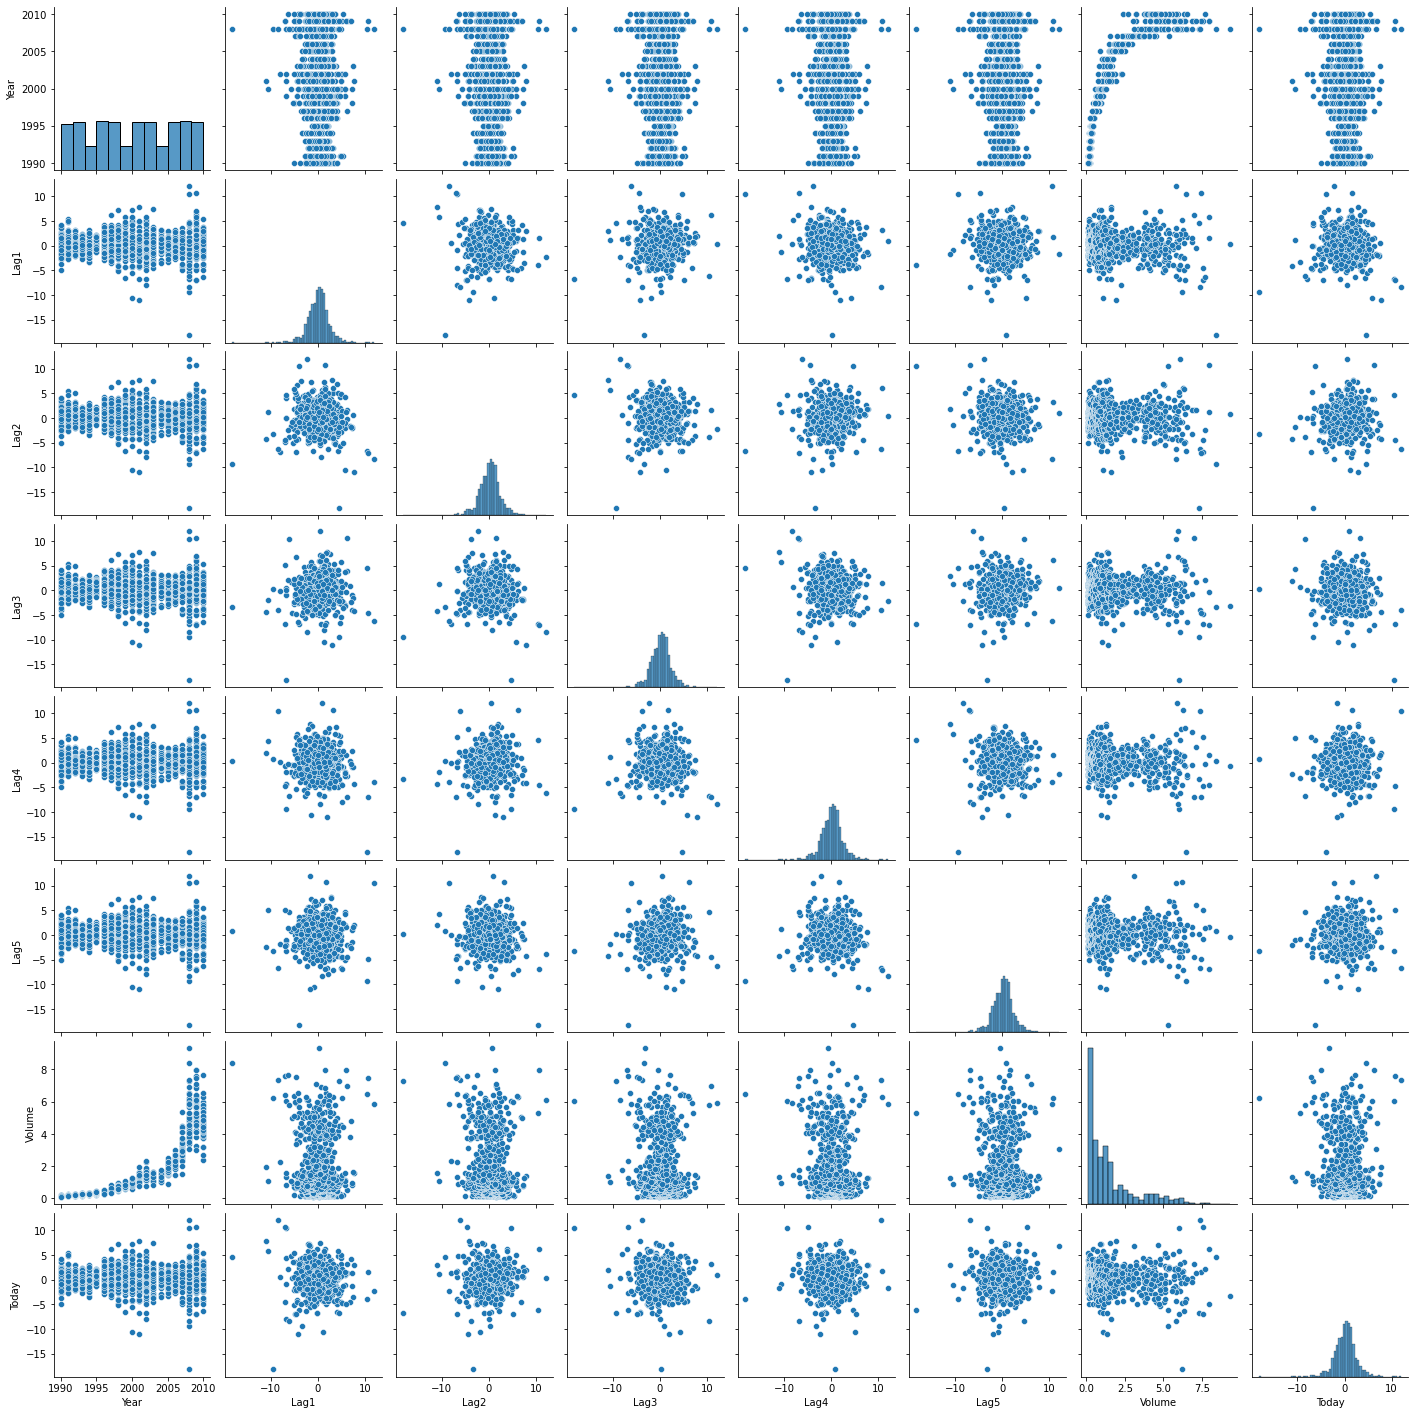

In [5]:
sns.pairplot(df);

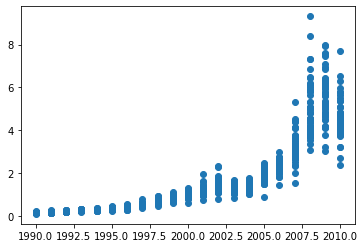

In [6]:
plt.scatter(df['Year'],df['Volume']);

*  The Year/Volume relationship is the only one with a visible pattern

# (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [7]:
#logistic regression model
train_cols = ['Lag1','Lag2','Lag3','Lag4','Lag5','Volume'] #independent var. considered in the logistic model
lr = LogisticRegression()
mod = lr.fit(df[train_cols], df['Direction'])

In [8]:
mod.coef_ #independent var. coefficients

array([[-0.04123854,  0.05840384, -0.01605138, -0.02776243, -0.01446302,
        -0.02270963]])

In [9]:
mod.intercept_ #interception

array([0.26680422])

In [10]:
df['Direction'] = df['Direction'].map({'Down':0, 'Up':1})

#fit model
y, X = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df, return_type='dataframe')
#logit = sm.Logit(y.ix[:,0], X) #
logit = sm.Logit(y, X) 
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [11]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                0.006580
Time:                        23:46:38   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

* Statistical significant predictor is Lag2 because it has a small P|z|. Small P|Z| means that there's a small probability that Lag2 coefficient is equal to zero.

# (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

In [12]:
df['Direction'] = df['Direction'].map({0:'Down', 1:'Up'})

#confusion matrix
conf_mat = confusion_matrix(df['Direction'], lr.predict(df[train_cols]))
print(conf_mat) #alternative to 'fancy' plot

[[ 54 430]
 [ 48 557]]


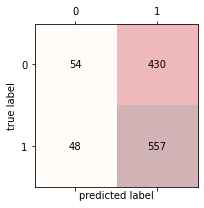

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

* The confusion matrix gives us two types of mistakes: 1) false positives; 2) false negatives.
* A false positive occurs when our prediction gives us a positive value but the real value is negative. A false negative occurs   when our prediction gives us a negative value but the real value is positive.
* Assuming that class 1 ('Up') is the positive class, our model correctly classified 54 samples that belong to class 0 (true       negatives) and 557 samples that belong to class 1 (true positives). However, our model also incorrectly misclassified 430       samples from class 0 to class 1 (false negatives), and it predicted that 48 samples were 'Up' although they were 'Down' (false    positives).


In [14]:
#overall fraction of correct predictions
lr.score(df[train_cols],df['Direction'])

0.5610651974288338

# 
The overall fraction of correct predictions is 56.11%. The model has higher flase positive rate

# (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [15]:
#partitioning the dataset
df_9908 = df[(df['Year'] >=1990) & (df['Year'] <=2008)]
df_0910 = df[(df['Year'] >=2009) & (df['Year'] <=2010)]

In [16]:
#to avoid 'ValueError: Found arrays with inconsistent numbers of sample'
#shape must be (X,1) and not (X,)
X = df_9908['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

In [17]:
#logistic regression
mod = lr.fit(X,df_9908['Direction']) #regression object already exists; just need to fit it to the new data

In [18]:
#confusion matrix
X = df_0910['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

conf_mat = confusion_matrix(df_0910['Direction'], lr.predict(X))
print(conf_mat)

[[ 9 34]
 [ 5 56]]


In [19]:
#overall fraction of correct predictions
lr.score(X, df_0910['Direction'])

0.625

 The overall fraction of correct predictions is 62.5%.

# (e) Repeat (d) using LDA.

In [20]:
#getting data ready
X = df_9908['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#linear discriminant analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X,df_9908['Direction'])

LinearDiscriminantAnalysis()

In [21]:
#getting data ready
X = df_0910['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#confusion matrix
conf_mat = confusion_matrix(df_0910['Direction'], lda.predict(X))
print(conf_mat)

[[ 9 34]
 [ 5 56]]


In [22]:
#overall fraction of correct predictions
#it will be helpful for the next question
lda.score(X, df_0910['Direction'])

0.625

Using Linear Discriminant Analysis to develop a classifying model yielded similar results as the logistic regression model created in part D

# (g) Repeat (d) using KNN with K = 1.

In [23]:
#getting data ready
X = df_9908['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#creating an instance of Neighbours Classifier and fitting the data
nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(X,df_9908['Direction'])

KNeighborsClassifier(n_neighbors=1)

In [24]:
#getting data ready
X = df_0910['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#confusion matrix
conf_mat = confusion_matrix(df_0910['Direction'], nbrs.predict(X))
print(conf_mat)

[[21 22]
 [30 31]]


In [25]:
#overall fraction of correct predictions
#it will be helpful for the next question
nbrs.score(X, df_0910['Direction'])

0.5

The overall fraction of correct predictions is 50%

# (i) Which of these methods appears to provide the best results on this data?

The methods that appear to provide the best results is the logistic regression and  linear discriminant analysis (LDA). They are the methods where score (overall fraction of correct predictions) is higher (0.625)

Prediction for K Nearest Neighbors is 0.5 and logistic legression& LDA has prediction value 0.625 and The logistic regression and LDA have the minimum error rate.



# (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusionmatrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [26]:
#trying with a different number of neighbors
n_nbrs = 10

#getting data ready for the neigb
X = df_9908['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#creating an instance of Neighbours Classifier and fitting the data
nbrs = KNeighborsClassifier(n_neighbors=n_nbrs)
nbrs.fit(X,df_9908['Direction'])

#getting data ready for the confusion matrix
X = df_0910['Lag2']
X = X.values.reshape(np.shape(X)[0],1)

#confusion matrix
conf_mat = confusion_matrix(df_0910['Direction'], nbrs.predict(X))
print(conf_mat)

[[22 21]
 [24 37]]


Optimization terminated successfully.
         Current function value: 0.692131
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1088
Method:                           MLE   Df Model:                            0
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:               -0.007524
Time:                        23:46:39   Log-Likelihood:                -753.73
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0263      0.018      1.482      0.138      -0.008       0.061


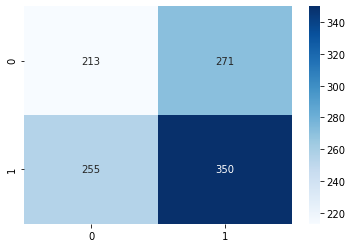

In [27]:
X_a  = df['Lag2'] + df['Lag4']
y_a    = df['Direction'].map(lambda x:0 if x == 'Down' else 1) #Up:1 Down:0
lg_a = sm.Logit(y_a, X_a).fit()

print(lg_a.summary())
pred = lg_a.predict(X_a)
prediction = list(map(round, pred))

cm = confusion_matrix(y_pred=prediction,y_true=y_a)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')
plt.show()

Optimization terminated successfully.
         Current function value: 0.692784
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1088
Method:                           MLE   Df Model:                            0
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:               -0.008476
Time:                        23:46:40   Log-Likelihood:                -754.44
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0168      0.019      0.887      0.375      -0.020       0.054


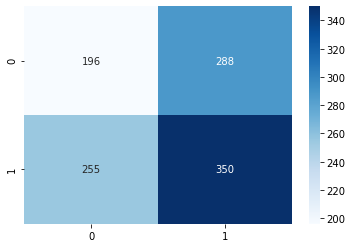

In [28]:
X_a  = df['Lag1'] + df['Lag2']
y_a    = df['Direction'].map(lambda x:0 if x == 'Down' else 1) #Up:1 Down:0
lg_a = sm.Logit(y_a, X_a).fit()

print(lg_a.summary())
pred = lg_a.predict(X_a)
prediction = list(map(round, pred))

cm = confusion_matrix(y_pred=prediction,y_true=y_a)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')
plt.show()

# Probelm 2

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib

# (a)  Generate a data set with n = 500 and p = 2

In [30]:
np.random.seed(0)
X1 = np.random.uniform(0, 1, 500) - 0.5
X2 = np.random.uniform(0, 1, 500) - 0.5
Y = ((X1**2 - X2**2) > 0).astype(int)

print("X1",X1)
print("X2",X2)
print("Y",Y)

X1 [ 0.0488135   0.21518937  0.10276338  0.04488318 -0.0763452   0.14589411
 -0.06241279  0.391773    0.46366276 -0.11655848  0.29172504  0.02889492
  0.06804456  0.42559664 -0.42896394 -0.4128707  -0.4797816   0.33261985
  0.27815675  0.37001215  0.47861834  0.29915856 -0.03852064  0.28052918
 -0.38172557  0.13992102 -0.35664671  0.44466892  0.02184832 -0.08533806
 -0.23544439  0.27423369 -0.04384967  0.06843395 -0.4812102   0.1176355
  0.11209572  0.116934    0.44374808  0.1818203  -0.1404921  -0.06296805
  0.1976312  -0.43977453  0.16676672  0.17063787 -0.28961744 -0.3710737
 -0.18457165 -0.13628923  0.07019677 -0.06139849  0.48837384 -0.39795519
 -0.29112324 -0.33869048  0.15310833 -0.2467084  -0.03368923 -0.25557441
 -0.34103042 -0.38962486  0.15632959 -0.36181705 -0.30341764 -0.13127483
  0.32099323 -0.40289872  0.33794491 -0.40390159  0.47645947 -0.0313488
  0.47676109  0.10484552  0.23926358 -0.46081221 -0.21719304 -0.37980344
 -0.2038598  -0.38127228 -0.18201682 -0.08573701 -0

# b) Plot the observations, colored according to their class labels.

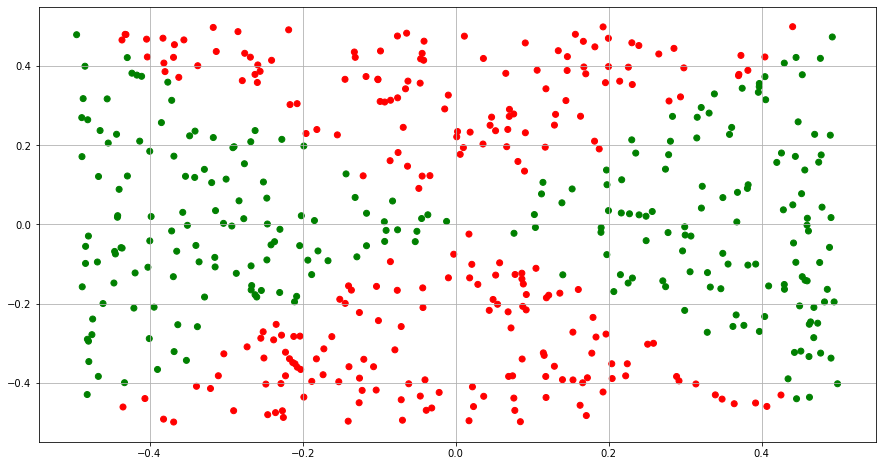

In [31]:
color= ['red' if l == 0 else 'green' for l in Y]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

# c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [32]:
X = np.column_stack((X1,X2))
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X, Y)
Y_train = clf.predict(X)
print("intercepts",clf.intercept_) #interception
print("Coeffecients",mod.coef_) #coefficients)
print("Score",clf.score(X,Y))
confusion_matrix(Y, clf.predict(X))

intercepts [-0.01427601]
Coeffecients [[0.05804742]]
Score 0.558


array([[156,  96],
       [125, 123]], dtype=int64)

# d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

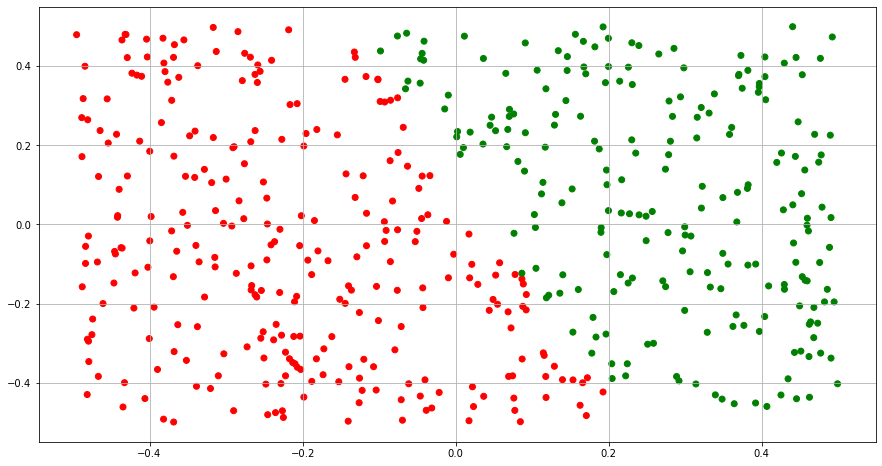

In [33]:
color= ['red' if l == 0 else 'green' for l in Y_train]
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

# e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors

In [34]:
import math
X1_2 = X1**2
X2_3 = X1**3
X1_X2 = X1*X2
#log_X2 = math.log(X2)

X = np.column_stack((X1,X2,X1_2,X1_X2,X2_3,))
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X, Y)
Y_train = clf.predict(X)

print("intercepts",clf.intercept_)
print("coefficients",clf.coef_)
print("Score",clf.score(X,Y))
confusion_matrix(Y, clf.predict(X))

intercepts [-0.56495718]
coefficients [[0.28345477 0.07027039 6.55087576 0.09642295 0.16325497]]
Score 0.754


array([[212,  40],
       [ 83, 165]], dtype=int64)

# (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

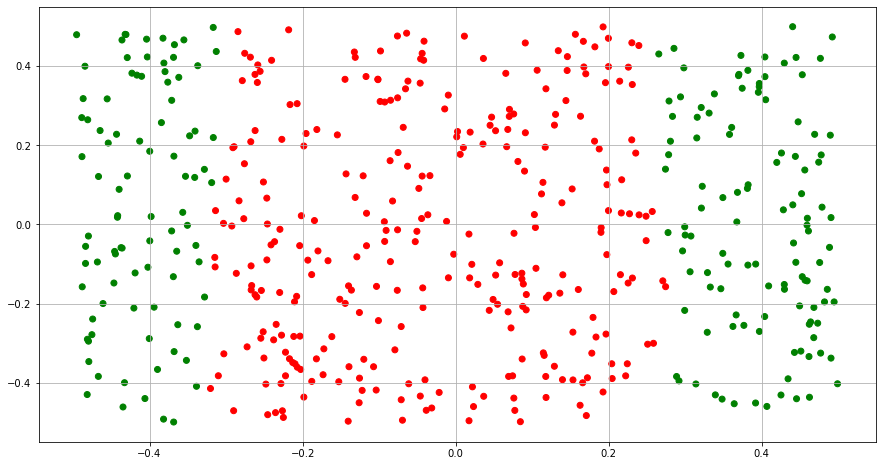

In [35]:
color= ['red' if l == 0 else 'green' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

# g) ) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

intercepts [-0.1652094]
coefficients [[2.36923086 0.26223844]]
Score 0.568
[[161  91]
 [125 123]]


Text(0.5, 1.0, 'Linear Kernel')

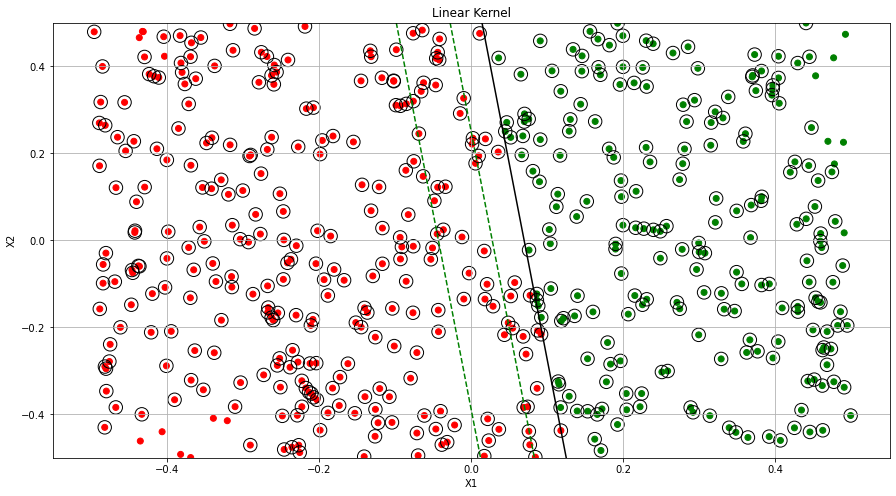

In [36]:
X = np.column_stack((X1,X2))
# fit the linear model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, Y)
Y_train = clf.predict(X)
print("intercepts",clf.intercept_)
print("coefficients",clf.coef_)
print("Score",clf.score(X,Y))
print(confusion_matrix(Y, clf.predict(X)))

color= ['red' if l == 0 else 'green' for l in Y_train]

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-0.5, 0.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Linear Kernel")

# h) ) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predictednclass labels.

intercepts [0.25415279]
Score 0.994
[[249   3]
 [  0 248]]


Text(0.5, 1.0, 'Polynomial Kernel (Degree: 2)')

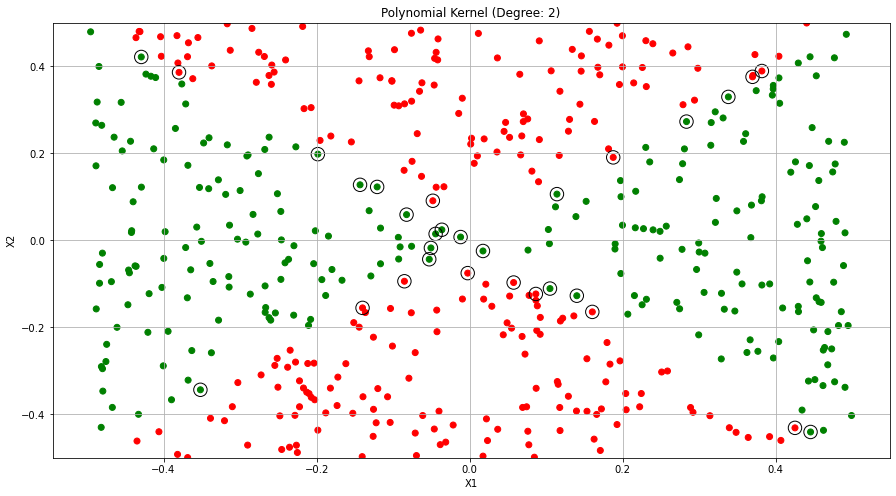

In [37]:
X = np.column_stack((X1,X2))
# fit the linear model
clf = svm.SVC(kernel='poly', degree=2, C=100)
clf.fit(X, Y)
Y_train = clf.predict(X)

print("intercepts",clf.intercept_)
print("Score",clf.score(X,Y))
print(confusion_matrix(Y, clf.predict(X)))

color= ['red' if l == 0 else 'green' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")

# Problem 3

# (c) Plot the logistic loss function and hinge loss function with respect to yf(x) in one figure to observe the similarities between them. Assume yf(x) range from -5 to 5.

In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
%matplotlib inline

In [39]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot

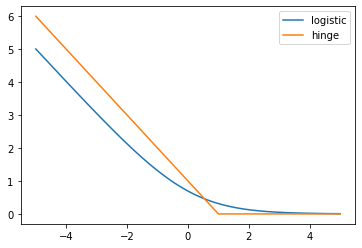

In [40]:
grid = np.linspace(-5,5,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()